# Descriptive statistics (with solution)

When you receive a new set of data, one of the initial tasks is to summarize it in a concise and easy-to-understand way. This process is referred to as **_descriptive statistics_** and is the primary focus of this chapter. It is essential to understand the need for descriptive statistics, which will be explained shortly. For now, we will focus on the data by loading two files, `afl_finalists.csv` and `afl_margins.csv`, **without worrying about the Python code**.

In [1]:
# pip install pandas
# pip install seaborn
# pip install statistics
# pip install scipy
# pip install statsmodels

In [63]:
import os
import pandas as pd

# Set the working directory
os.chdir('C:/EPF/data_analysis_2024_2025/1_descriptive_satistics/')

# Load the data
afl_finalists = pd.read_csv('data/afl.finalists.csv')
afl_margins = pd.read_csv('data/afl.margins.csv')

We will be focusing on two variables, namely `afl_finalists` and `afl_margins`, which are related to the Australian Football League (AFL). The `afl_margins` variable includes the winning margin (number of points) for all 176 games played during the 2010 season, both home and away. On the other hand, the `afl_finalists` variable consists of the names of all 400 teams that participated in 200 final matches between 1987 and 2010. To begin, let's take a closer look at the `afl_margins` variable.

In [66]:
print(afl_margins)

     afl.margins
0             56
1             31
2             56
3              8
4             32
..           ...
171           28
172           38
173           29
174           10
175           10

[176 rows x 1 columns]


The current output does not provide a clear understanding of what the data is trying to convey. Simply observing the data is not an efficient method for comprehending it. To gain insight into the data, we must compute descriptive statistics. 

One of the easiest way to do it is to plot a histogram:

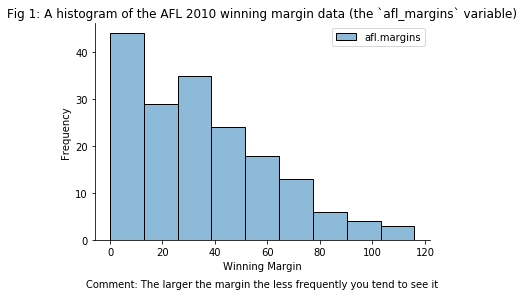

In [67]:
import seaborn as sns

ax = sns.histplot(afl_margins)
ax.set(xlabel ="Winning Margin", ylabel = "Frequency")
ax.set_title("Fig 1: A histogram of the AFL 2010 winning margin data (the `afl_margins` variable)")

caption_text = "Comment: The larger the margin the less frequently you tend to see it"
ax.text(0.5, -0.2, caption_text, ha = 'center', va = 'center', transform = ax.transAxes)

sns.despine()

## A. Univariate analysis: Measures of central tendency

While creating visualizations, such as the one shown in **Fig 1**, is an effective way to convey the essential message of the data, it is often helpful to summarize the data with a few key statistics. To begin, you would typically calculate a measure of central tendency, which provides insight into where the "average" or "middle" of the data lies. The mean, median and mode are the most commonly used measures of central tendency. In the following sections, we will discuss each of these measures and their relevance in various scenarios.

### 1. The mean (the average)

The **_mean_** of a set of observations is obtained by calculating the sum of all the values in the set and then dividing the result by the total number of values. For instance, if we consider the first five AFL margins as 56, 31, 56, 8, and 32, then we can calculate their mean as follows:

$$ \frac{56 + 31 + 56 + 8 + 32}{5} = \frac{183}{5} = 36.60 $$

Of course, this definition of the mean isn't new to anyone: averages (i.e., means) are used so often in everyday life that this is pretty familiar stuff. However, since the concept of a mean is something that everyone already understands, I'll use this as an excuse to start introducing some of the mathematical notation that statisticians use to describe this calculation, and talk about how the calculations would be done in Python. 

The first notation we introduce is $N$, which denotes the number of observations that we want to average (in this case, $N=5$). We also need to label each observation using a symbol, and it is customary to use $X$ for this purpose. We use subscripts to indicate which observation we are referring to, so that $X_1$ denotes the first observation, $X_2$ the second observation, and so on up to $X_N$ for the last observation. More generally, we use $X_i$ to refer to the $i$-th observation. To illustrate this notation, consider the following table which lists the five observations in the `afl_margins` variable, along with the corresponding mathematical symbol and the actual value:


|the observation        |its symbol |the observed value |
|:----------------------|:----------|:------------------|
|winning margin, game 1 |$X_1$      |56 points          |
|winning margin, game 2 |$X_2$      |31 points          |
|winning margin, game 3 |$X_3$      |56 points          |
|winning margin, game 4 |$X_4$      |8 points           |
|winning margin, game 5 |$X_5$      |32 points          |

Let's try to write a formula for the mean. By tradition, we use $\bar{X}$ as the notation for the mean. So the calculation for the mean could be expressed using the following formula:  

$$ \bar{X} = \frac{X_1 + X_2 + ... + X_{N-1} + X_N}{N} $$

This formula is entirely correct, but it's terribly long, so we make use of the **_summation symbol_** $\scriptstyle\sum$ to shorten it. If I want to add up the first five observations, I could write out the sum the long way, $X_1 + X_2 + X_3 + X_4 +X_5$ or I could use the summation symbol to shorten it to this:  


$$ \sum_{i=1}^5 X_i $$


Taken literally, this could be read as "the sum, taken over all $i$ values from 1 to 5, of the value $X_i$ ". But basically, what it means is "add up the first five observations". In any case, we can use this notation to write out the formula for the mean, which looks like this:  


$$ \bar{X} = \frac{1}{N} \sum_{i=1}^N X_i $$

#### Calculating the mean in Python
Using simple mathematical operations in Python, we can easily calculate the mean of a series of number:

In [68]:
(56 + 31 + 56 + 8 + 32) / 5

36.6

... in which case Python outputs the answer 36.6, just as if it were a calculator. 

However, that's not the only way to do the calculations, and when the number of observations starts to become large, it's easily the most tedious. Besides, in almost every real world scenario, you've already got the actual numbers stored in a variable of some kind, just like we have with the `afl_margins` variable. Under those circumstances, what you want is a function that will just add up all the values stored in a numeric vector. That's what the `sum()` function does. If we want to add up all 176 winning margins in the data set, we can do so using the following command:

In [6]:
margins = afl_margins['afl.margins']
sum(margins)

6213

If we only want the sum of the first five observations, then we can use square brackets to pull out only the first five elements of the vector. So the command would now be:

In [7]:
margins[0:5]

0    56
1    31
2    56
3     8
4    32
Name: afl.margins, dtype: int64

To calculate the mean, we now tell Python to divide the output of this summation by five, so the command that we need to type now becomes the following:

In [8]:
sum(margins[0:5])/5

36.6

Or, we could just ask Python for the mean, without further ado:

In [9]:
margins[0:5].mean()

36.6

There is another way to calculate mean in Python is by using statistics package:

In [69]:
import statistics
statistics.mean(margins)

35.30113636363637

Here's what we would do to calculate the mean for only the first five observations:

In [11]:
statistics.mean(margins[0:5])

36.6

### 2. The median

The second measure of central tendency that people use a lot is the **_median_**, and it's even easier to describe than the mean. The median of a set of observations is just the middle value. As before let's imagine we were interested only in the first 5 AFL winning margins: 56, 31, 56, 8 and 32. To figure out the median, we sort these numbers into **ascending** order:  

$$
8, 31, \mathbf{32}, 56, 56
$$
From inspection, it's obvious that the median value of these 5 observations is 32, since that's the middle one in the sorted list (I've put it in bold to make it even more obvious). Easy stuff. But what should we do if we were interested in the first 6 games rather than the first 5? Since the sixth game in the season had a winning margin of 14 points, our sorted list is now 

$$
8, 14, \mathbf{31}, \mathbf{32}, 56, 56
$$
and there are *two* middle numbers, 31 and 32. The median is defined as the average of those two numbers, which is of course 31.5. As before, it's very tedious to do this by hand when you've got lots of numbers. To illustrate this, here's what happens when you use Python to sort all 176 winning margins. First, I'll use the `sort_values` method to display the winning margins in increasing numerical order. 

`sort_values` is a *method* that belong to `pandas` *objects*. We'll discuss `pandas` more, and you are already somewhat familiar with the concept of methods in Python. For now, the important thing is that it works!

In [70]:
sorted_margins = afl_margins.sort_values(by = 'afl.margins')
sorted_margins[84:92]

,afl.margins
165,29
173,29
150,29
117,30
1,31
4,32
123,32
136,33


If we peek at the middle of these sorted values, we can see that the middle values are 30 and 31, so the median winning margin for 2010 was 30.5 points. In real life, of course, no-one actually calculates the median by sorting the data and then looking for the middle value. In real life, we use the `median` command:

By now, you are hopefully getting used to the "dot" syntax, where we use a `.` to call an object method. These distinctions don't really matter so much at this point anyway, so I'm just going to go ahead and start calling things "commands". However, for the sake of thoroughness, I will point out that if your data are not in an object like a `pandas` series that has a built-in `median` method, you can also do `import statistics` and then write `statistics.median(margins)` and get the same result.

In [71]:
margins.median()

30.5

which outputs the median value of 30.5. 

#### Mean or median? What's the difference?
Knowing how to calculate means and medians is only a part of the story. You also need to understand what each one is saying about the data, and what that implies for when you should use each one. 

The mean is kind of like the "centre of gravity" of the data set, whereas the median is the "middle value" in the data. What this implies, as far as which one you should use, depends a little on what type of data you've got and what you're trying to achieve. As a rough guide:

- If your data are categorical, you probably shouldn't be using either the mean or the median. Both the mean and the median rely on the idea that the numbers assigned to values are meaningful. If the numbering scheme is arbitrary, then it's probably best to use the **Mode** instead. 
- If your data are ordinal, you're more likely to want to use the **median** than the mean. The median only makes use of the order information in your data (i.e., which numbers are bigger), but doesn't depend on the precise numbers involved. That's exactly the situation that applies when your data are numerical.
- If your data are norminal, either **median** or **mean** one is generally acceptable. Which one you pick depends a bit on what you're trying to achieve. The mean has the advantage that it uses all the information in the data (which is useful when you don't have a lot of data), but it's very sensitive to extreme values. That's when we use **trimmed mean**

### A real life example

To try to get a sense of why you need to pay attention to the differences between the mean and the median, let's consider a real life example. 

Suppose you are applying for two jobs in two different companies. You want to know which company has a better salary policy. You go to Glassdoor and find out know the average salary of company A and company B. 


**Company A**: Nine employees earn around 50,000 euros per year, while the tenth employee earns 1 million euros per year.

**Company B**: Nine employees earn from 50,000 to 150,000 euros per year, while the tenth employee earns 500,000 euros per year.

In [14]:
import statistics
import matplotlib.pyplot as plt

# Define the salaries of the company A
salariesA = [50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 1000000]

# Define the salaries of the company A
salariesB = [50000, 50000, 55000, 80000, 65000, 90000, 80000, 100000, 150000, 500000]

# Calculate the mean and median salaries for both sets of data
mean_salaryA = statistics.mean(salariesA)
median_salaryA = statistics.median(salariesA)
mean_salaryB = statistics.mean(salariesB)
median_salaryB = statistics.median(salariesB)


The mean salary of **company A** would be calculated as (9 x 50,000) + (1,000,000) / 10, which equals 145,000 euros.

The mean salary of **company B** would be calculated as (50,000 + 50,000 + 55,000 + 80,000 + 65,000 + 90,000 + 80,000 + 100,000 + 150,000 + 500,000) / 10, which equals 122,000 euros.

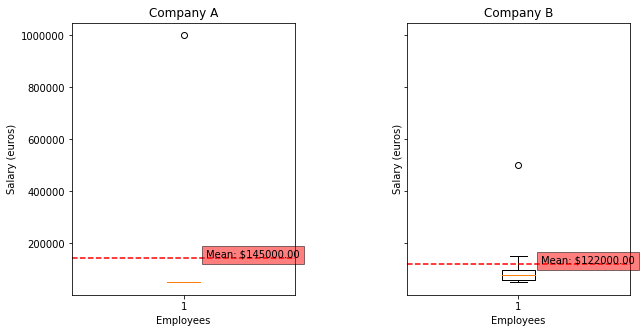

In [15]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Create a boxplot for the first set of data
axs[0].boxplot(salariesA)
axs[0].axhline(mean_salaryA, color='red', linestyle='--')
axs[0].set_title('Company A')
axs[0].set_xlabel('Employees')
axs[0].set_ylabel('Salary (euros)')

# Add the mean salary to the first boxplot
axs[0].text(1.1, mean_salaryA, f"Mean: ${mean_salaryA:.2f}", bbox=dict(facecolor='red', alpha=0.5))

# Create a boxplot for the second set of data
axs[1].boxplot(salariesB)
axs[1].axhline(mean_salaryB, color='red', linestyle='--')
axs[1].set_title('Company B')
axs[1].set_xlabel('Employees')
axs[1].set_ylabel('Salary (euros)')

# Add the mean salary to the second boxplot
axs[1].text(1.1, mean_salaryB, f"Mean: ${mean_salaryB:.2f}", bbox=dict(facecolor='red', alpha=0.5))

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.5)

# Display the plot
plt.show()

By just looking at the mean, it does not accurately represent the typical salary of the employees in this company because the 1 million euros salary is an extreme outlier that skews the data. In this case, it would be better to use the median salary instead, which is the middle value when the salaries are listed in order. 

The median salary of **company A** is 50,000 euros

The median salary of **company B** is 80,000 euros


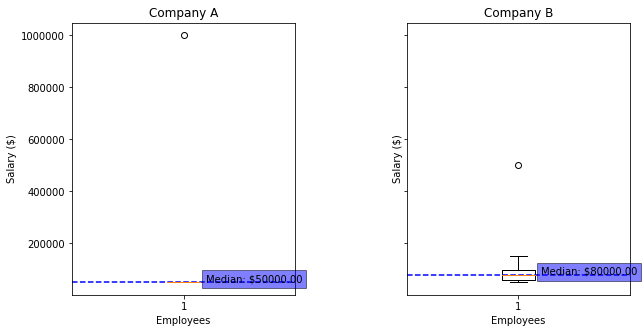

In [16]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Create a boxplot for the first set of data
axs[0].boxplot(salariesA)
axs[0].axhline(median_salaryA, color='blue', linestyle='--')
axs[0].set_title('Company A')
axs[0].set_xlabel('Employees')
axs[0].set_ylabel('Salary ($)')

# Add the median salary to the first boxplot
axs[0].text(1.1, median_salaryA, f"Median: ${median_salaryA:.2f}", bbox=dict(facecolor='blue', alpha=0.5))

# Create a boxplot for the second set of data
axs[1].boxplot(salariesB)
axs[1].axhline(median_salaryB, color='blue', linestyle='--')
axs[1].set_title('Company B')
axs[1].set_xlabel('Employees')
axs[1].set_ylabel('Salary ($)')

# Add the median salary to the second boxplot
axs[1].text(1.1, median_salaryB, f"Median: ${median_salaryB:.2f}", bbox=dict(facecolor='blue', alpha=0.5))

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.5)

# Display the plot
plt.show()


Obviously, you may prefer **company B** to **company A** thanks to the median values, which is a more representative value of the typical salary in these two companies.

**Therefore, in situations where there are outliers or skewed data, it's important to pay attention to the difference between the mean and the median to get a more accurate understanding of the data.**

### Trimmed mean 

One of the fundamental rules of applied statistics is that the data are messy. Real life is never simple, and so the data sets that you obtain are never as straightforward as the statistical theory says. This can have awkward consequences. To illustrate, consider this rather strange looking data set: 

$$
-100,2,3,4,5,6,7,8,9,10
$$
If you were to observe this in a real life data set, you'd probably suspect that something funny was going on with the $-100$ value. It's probably an **_outlier_**, a value that doesn't really belong with the others. You might consider removing it from the data set entirely, and in this particular case I'd probably agree with that course of action. In real life, however, you don't always get such cut-and-dried examples. For instance, you might get this instead: 

$$
-15,2,3,4,5,6,7,8,9,12
$$
The $-15$ looks a bit suspicious, but not anywhere near as much as that $-100$ did. In this case, it's a little trickier. It *might* be a legitimate observation, it might not.

When faced with a situation where some of the most extreme-valued observations might not be quite trustworthy, the mean is not necessarily a good measure of central tendency. It is highly sensitive to one or two extreme values, and is thus not considered to be a **_robust_** measure. One remedy that we've seen is to use the median. A more general solution is to use a "trimmed mean".  To calculate a trimmed mean, what you do is "discard" the most extreme examples on both ends (i.e., the largest and the smallest), and then take the mean of everything else. The goal is to preserve the best characteristics of the mean and the median: just like a median, you aren't highly influenced by extreme outliers, but like the mean, you "use" more than one of the observations. Generally, we describe a trimmed mean in terms of the percentage of observation on either side that are discarded. 

So, for instance, a **10% trimmed** mean discards the largest **10% of the observations** *and* **the smallest 10% of the observations**, and then takes the **mean of the remaining 80% of the observations**. 

Not surprisingly, the 0% trimmed mean is just the regular mean, and the 50% trimmed mean is the median. In that sense, trimmed means provide a whole family of central tendency measures that span the range from the mean to the median.


For our example above, we have 10 observations, and so a 10% trimmed mean is calculated by ignoring the largest value (i.e., `12`) and the smallest value (i.e., `-15`) and taking the mean of the remaining values. First, let's enter the data

In [17]:
dataset = [-15,2,3,4,5,6,7,8,9,12]

Next, let's calculate means and medians. Since our data is now in a regular old list, and not in a dataframe, we can't use the `.mean()` and `.median()` methods, so we'll just go the old-school route, and `import` our old friend `statistics`:

In [18]:
import statistics
statistics.mean(dataset)

4.1

In [19]:
statistics.median(dataset)

5.5

That's a fairly substantial difference, but the mean is being influenced a bit too much by the extreme values at either end of the data set, especially the $-15$ one. So let's just try trimming the mean a bit. If I take a 10% trimmed mean, we'll drop the extreme values on either side, and take the mean of the rest: 

Here I use the `stats` function from the `scipy` module. But `stats` is picky: it only wants to deal with data in a certain format called `numpy arrays`. So, to give it what it wants, we also need to import `numpy`, and then convert our data into an `array`. Also, I only imported part of the `scipy` module (you can do that) and renamed the `numpy` module (you can do that too)

In [72]:
import numpy as np
from scipy import stats

# Transform to numpy array
dataset2 = np.array(dataset)

stats.trim_mean(dataset2, 0.1)

5.5

which in this case gives exactly the same answer as the median. Note that, to get a 10% trimmed mean you write `trim = .1`, not `trim = 10`. In any case, let's finish up by calculating the 5% trimmed mean for the `afl_margins` data 

In [21]:
dataset3 = np.array(margins)
stats.trim_mean(dataset3, 0.05)

33.75

### Mode

The mode of a sample is very simple: it is the value that occurs most frequently. 

To illustrate the mode using the AFL data, let's examine a different aspect to the data set. Who has played in the most finals? The `afl_finalists` data contains the name of every team that played in any AFL final from 1987-2010, so let's have a look at it. To do this we will use the `head()` method. `head()` is a method that can be used when the data is contained in a `pandas` `dataframe` object (which ours is). <br/>It can be useful when you're working with data with a lot of rows, since you can use it to tell you how many rows to return. There have been a lot of finals in this period so printing afl finalists using `print(afl_finalists)` will just fill us the screen. The command below tells Python we just want the first 25 rows of the dataframe.

In [22]:
afl_finalists.head(n = 25)

,afl.finalists
0,Hawthorn
1,Melbourne
2,Carlton
3,Melbourne
4,Hawthorn
5,Carlton
6,Melbourne
7,Carlton
8,Hawthorn
9,Melbourne


There are actually 400 entries. We *could* read through all 400, and count the number of occasions on which each team name appears in our list of finalists, thereby producing a **_frequency table_**. However, that would be mindless and boring: exactly the sort of task that computers are great at. So let's use the `value_counts()` method to do this task for us:

`value_counts()` is a method available to us because our data is in a `pandas` dataframe. In the example below, I have made a new variable called `finalists` which contains the `afl.finalists` column from the `afl_finalists` dataframe. Of course, we could just do `value_counts()` directly on the `pandas` column like this: `afl_finalists['afl.finalists'].value_counts()`. The result is the same.

In [23]:
finalists = afl_finalists['afl.finalists']
finalists.value_counts()

Geelong             39
West Coast          38
Essendon            32
Melbourne           28
Collingwood         28
North Melbourne     28
Hawthorn            27
Carlton             26
Adelaide            26
Sydney              26
Brisbane            25
St Kilda            24
Western Bulldogs    24
Port Adelaide       17
Richmond             6
Fremantle            6
Name: afl.finalists, dtype: int64

Now that we have our frequency table, we can just look at it and see that, over the 24 years for which we have data, Geelong has played in more finals than any other team. Thus, the mode of the `finalists` data is `"Geelong"`. If we want to extract the mode without inspecting the table, we can use the `statistics.mode` function to tell us which team has most often played in the finals.

In [24]:
statistics.mode(finalists)

'Geelong'

If we want to find the number of finals they have played in, we can e.g. first extract the frequencies with `value_counts` and then find the largest value with `max`.

In [25]:
freq = finalists.value_counts()
freq.max()

39

Taken together, we observe that Geelong (39 finals) played in more finals than any other team during the 1987-2010 period. 

One last point to make with respect to the mode. While it's generally true that the mode is most often calculated when you have nominal scale data (because means and medians are useless for those sorts of variables), there are some situations in which you really do want to know the mode of an ordinal, interval or ratio scale variable. <br/>
For instance, let's go back to thinking about our `afl_margins` variable. This variable is clearly ratio scale, and so in most situations the mean or the median is the measure of central tendency that you want. But consider this scenario... a friend of yours is offering a bet. They pick a football game at random, and (without knowing who is playing) you have to guess the *exact* margin. If you guess correctly, you win 50 euros. If you don't, you lose 1 euros. There are no consolation prizes for "almost" getting the right answer. You have to guess exactly the right margin. For this bet, the mean and the median are completely useless to you. It is the mode that you should bet on. So, we calculate this modal value

In [26]:
statistics.mode(margins)

3

In [27]:
freq = margins.value_counts()
freq.max()

8

So the 2010 data suggest you should bet on a 3 point margin, and since this was observed in 8 of the 176 game (4.5% of games) the odds are firmly in your favour. 

## B. Univariate analysis: Measures of variability

The statistics that we've discussed so far all relate to *central tendency*. That is, they all talk about which values are "in the middle" or "popular" in the data. However, central tendency is not the only type of summary statistic that we want to calculate. The second thing that we really want is a measure of the **_variability_** of the data. That is, how **"spread out"** are the data? How "far" away from the mean or median do the observed values tend to be? For now, let's assume that the data are numerical, so we'll continue to use the `afl_margins` data.  We'll use this data to discuss several different measures of spread, each with different strengths and weaknesses. 

### 1. Range

The **_range_** of a variable is very simple: it's the biggest value minus the smallest value. For the AFL winning margins data, the maximum value is 116, and the minimum value is 0. We can calculate these values in Python using the `max()` and `min()` functions:

`margins.max()`  
`margins.min()`

where I've omitted the output because it's not interesting.

Although the range is the simplest way to quantify the notion of "variability", it's one of the worst. Recall from our discussion of the mean that we want our summary measure to be robust. If the data set has one or two extremely bad values in it, we'd like our statistics not to be unduly influenced by these cases. If we look once again at our toy example of a data set containing very extreme outliers... 

$$
-100,2,3,4,5,6,7,8,9,10
$$
... it is clear that the range is not robust, since this has a range of 110, but if the outlier were removed we would have a range of only 8.

### 2. Interquartile range

The **_interquartile range_** (IQR) is like the range, but instead of calculating the difference between the biggest and smallest value, it calculates the difference between the 25th quantile and the 75th quantile.

- The 10th percentile of a data set is the smallest number $x$ such that 10% of the data is less than $x$. <br/>
- The 25th percentile of a data set is the smallest number $x$ such that 25% of the data is less than $x$. <br/>
- The 50th percentile of a data set is the smallest number $x$ such that 50% of the data is less than $x$. <br/>
- The 75th percentile of a data set is the smallest number $x$ such that 75% of the data is less than $x$. <br/>
- And so on...

With that logic, we've already come across the idea: the median of a data set is its 50th quantile / percentile! 

The `numpy` module actually provides you with a way of calculating quantiles, using the `quantile()` function. Let's use it to calculate the median AFL winning margin:

In [28]:
import numpy as np
np.quantile(margins, 0.5)

30.5

And not surprisingly, this agrees with the answer that we saw earlier with the `median()` function. Now, we can actually input lots of quantiles at once, by specifying which quantiles we want. So lets do that, and get the 25th and 75th percentile:

In [29]:
np.quantile(margins, [0.25, .75])

array([12.75, 50.5 ])

And, by noting that $50.5 - 12.75 = 37.75$, we can see that the interquartile range for the 2010 AFL winning margins data is 37.75. Of course, that seems like too much work to do all that typing, and luckily we don't have to, since `scipy` has already done the work for us and provided us with the  `stats.iqr` function, which will give us what we want.

In [30]:
from scipy import stats
stats.iqr(margins)

37.75

While it's obvious how to interpret the range, it's a little less obvious how to interpret the IQR. The simplest way to think about it is like this: the interquartile range is the range spanned by the "middle half" of the data. That is, one quarter of the data falls below the 25th percentile, one quarter of the data is above the 75th percentile, leaving the "middle half" of the data lying in between the two. And the IQR is the range covered by that middle half.

### 3. Mean absolute deviation

The two measures we've looked at so far, the range and the interquartile range, both rely on the idea that we can measure the spread of the data by looking at the quantiles of the data. However, this isn't the only way to think about the problem. A different approach is to select a meaningful reference point (usually the mean or the median) and then report the "typical" deviations from that reference point. What do we mean by "typical" deviation? Usually, the mean or median value of these deviations! In practice, this leads to two different measures, the "mean absolute deviation (from the mean)" and the "median absolute deviation (from the median)". From what I've read, the measure based on the median seems to be used in statistics, and does seem to be the better of the two, but to be honest I don't think I've seen it used much in psychology. The measure based on the mean does occasionally show up in psychology though. In this section I'll talk about the first one, and I'll come back to talk about the second one later.

Since the previous paragraph might sound a little abstract, let's go through the **_mean absolute deviation_** from the mean a little more slowly. One useful thing about this measure is that the name actually tells you exactly how to calculate it. 

Let's think about our AFL winning margins data, and once again we'll start by pretending that there's only 5 games in total, with winning margins of 56, 31, 56, 8 and 32. Since our calculations rely on an examination of the deviation from some reference point (in this case the mean), the first thing we need to calculate is the mean, $\bar{X}$. For these five observations, our mean is $\bar{X} = 36.6$. The next step is to convert each of our observations $X_i$ into a deviation score. We do this by calculating the difference between the observation $X_i$ and the mean $\bar{X}$. That is, the deviation score is defined to be $X_i - \bar{X}$. For the first observation in our sample, this is equal to $56 - 36.6 = 19.4$. Okay, that's simple enough. The next step in the process is to convert these deviations to absolute deviations. We do this by converting any negative values to positive ones. Mathematically, we would denote the absolute value of $-3$ as $|-3|$, and so we say that $|-3| = 3$. We use the absolute value function here because we don't really care whether the value is higher than the mean or lower than the mean, we're just interested in how *close* it is to the mean. To help make this process as obvious as possible, the table below shows these calculations for all five observations:

| $i$ (which game)   | $X_i$ (value)    | $X_i - \bar{X}$ (deviation from mean)      |  $\|X_i - \bar{X}\|$ (absolute deviation) |
|--------------|----------|--------------------------|--------------------|
| 1            | 56       | 19.4                     | 19.4               |
| 2            | 31       | -5.6                     | 5.6                |
| 3            | 56       | 19.4                     | 19.4               |
| 4            | 8        | -28.6                    | 28.6               |
| 5            | 32       | -4.6                     |  4.6               |

Now that we have calculated the absolute deviation score for every observation in the data set, all that we have to do to calculate the mean of these scores. Let's do that:


$$\frac{19.4 + 5.6 + 19.4 + 28.6 + 4.6}{5} = 15.52$$


And we're done. The mean absolute deviation for these five scores is 15.52. 

However, while our calculations for this little example are at an end, we do have a couple of things left to talk about. First, we should really try to write down a proper mathematical formula. But in order do to this I need some mathematical notation to refer to the mean absolute deviation. Irritatingly, "mean absolute deviation" and "median absolute deviation" have the same acronym (MAD), which leads to a certain amount of ambiguity. To make matters worse, packages that include functions to calculate these things for you _**both use the abbreviation MAD even though they mean different things!**_ Sigh. What I'll do is use AAD instead, short for *average* absolute deviation. Now that we have some unambiguous notation, here's the formula that describes what we just calculated:


<font color='blue'>

$$ ADD\mbox{}(X) = \frac{1}{N} \sum_{i = 1}^N |X_i - \bar{X}|$$

</font>




The last thing we need to talk about is how to calculate AAD in Python. One possibility would be to do everything using low level commands, laboriously following the same steps that I used when describing the calculations above. However, that's pretty tedious. You'd end up with a series of commands that might look like this:

In [31]:
from statistics import mean

X = [56, 31, 56, 8, 32]             # 1. A list X is defined, which contains some sample data
X_bar = mean(X)                     # 2. The mean of the data in list X is calculated and assigned to the variable X_bar.
AD = []                             # 3. An empty list AD is created to store the absolute differences between each data point and the mean
for i in X:                         # 4. A for loop is used to iterate through each value in the list X.     
    AD.append(abs((i-X_bar)))       #   For each value i in X, the absolute value of the difference between i and X_bar is calculated and appended to the list AD.
ADD = mean(AD)                      # 5. The mean of the values in the list AD is calculated and assigned to the variable ADD
print(ADD)                          # 6. Print the mean of the list ADD 

15.52


Or we can also calculate it with a Python function:

In [32]:
def ADD(data):
        # Calculate the mean of the data
    data_mean = sum(data) / len(data)
        # Calculate the absolute differences between each data point and the mean
    absolute_diffs = [abs(x - data_mean) for x in data]
        # Calculate the mean of the absolute differences
    mad = sum(absolute_diffs) / len(absolute_diffs)
    return mad

X = [56, 31, 56, 8, 32]
print(ADD(X))

15.52


Each of those commands is pretty simple, but there's just too many of them. And because I find that to be too much typing, I suggest using the `pandas` method `mad()` to make life easier. There is one important thing to notice, however: `pandas` will want the data to be in a different format `pandas.core.series.Series`. It can do lots of things that ordinary lists can't. To find the AAD, we can just do:

In [33]:
import pandas as pd

data = pd.Series( [56, 31, 56, 8, 32])
data.mad()

15.52

There is more than one thing to notice. `pandas` calls this the "MAD". And, as we have seen, this is _also_ the acronym for the _median absolute difference_. To find the median absolute difference, we can use the `robust` module from the `statsmodels` package, which has a function called, you guessed it, `mad`. Except this time the "m" in "MAD" stand for **"median" and not "mean"**.

We'll talk more about median absolute deviation below. For now, just be careful to be aware of which one you are using, and why, and everything will be ok!

In [34]:
import pandas as pd
import numpy as np
from statsmodels import robust

data = pd.Series([56, 31, 56, 8, 32])
pandas_mad = data.mad()

data = np.array([56, 31, 56, 8, 32])
statsmodels_mad = robust.mad(data, c = 1)

print("Pandas MAD is the mean absolute deviation:", pandas_mad)
print("Statsmodels MAD is the median absolute deviation:", statsmodels_mad)

Pandas MAD is the mean absolute deviation: 15.52
Statsmodels MAD is the median absolute deviation: 24.0


### 4. Variance

Although mean absolute deviation measure has its uses, it's not the best measure of variability to use. From a purely mathematical perspective, there are some solid reasons to prefer squared deviations rather than absolute deviations. If we do that, we obtain a measure is called the **_variance_**, which has a lot of really nice statistical properties that I'm going to ignore, and one massive psychological flaw that I'm going to make a big deal out of in a moment. The variance of a data set $X$ is sometimes written as $\mbox{Var}(X)$ but it's more commonly denoted $s^2$ (the reason for this will become clearer shortly). The formula that we use to calculate the variance of a set of observations is as follows:

<font color='blue'>
$$
\mbox{Var}(X) = \frac{1}{N} \sum_{i=1}^N \left( X_i - \bar{X} \right)^2
$$
</font>

As you can see, it's basically the same formula that we used to calculate the mean absolute deviation, except that instead of using "absolute deviations" we use "squared deviations". It is for this reason that the variance is sometimes referred to as the "mean square deviation".

Now that we've got the basic idea, let's have a look at a concrete example. Once again, let's use the first five AFL games as our data. If we follow the same approach that we took last time, we end up with the following table:

| which game | value | deviation from mean | squared deviation |
| :--------: | :---: | :-----------------: | :---------------: |
|     1      |  56   |        19.4         |      376.36       |
|     2      |  31   |        -5.6         |       31.36       |
|     3      |  56   |        19.4         |      376.36       |
|     4      |   8   |        -28.6        |      817.96       |
|     5      |  32   |        -4.6         |       21.16       |

The same table again, translated into Math-ese, looks like this:

| *i*      | *Xi* | $X_i - \bar{X}$     | $(X_i - \bar{X}$)$^2$                      |
| :--------: | :---: | :-----------------: | :-----------------------------------------: 
|     1      |  56   |        19.4 &#12644;&#12644;      |      376.36 &#12644;&#12644;|
|     2      |  31   |        -5.6 &#12644;&#12644;        |    31.36  &#12644;&#12644;|
|     3      |  56   |        19.4 &#12644;&#12644;        |    376.36 &#12644;&#12644;|
|     4      |   8   |        -28.6 &#12644;&#12644;       |    817.96 &#12644;&#12644;|
|     5      |  32   |        -4.6 &#12644;&#12644;        |    21.16  &#12644;&#12644;|

That last column contains all of our squared deviations, so all we have to do is average them. If we do that by typing all the numbers into Python by hand...

In [35]:
( 376.36 + 31.36 + 376.36 + 817.96 + 21.16 ) / 5

324.64

... we end up with a variance of 324.64. Exciting, isn't it? For the moment, let's ignore the burning question that you're all probably thinking (i.e., what the heck does a variance of 324.64 actually mean?) and instead talk a bit more about how to do the calculations in Python, because this will reveal something very weird.

As always, we want to avoid having to type in a whole lot of numbers ourselves, and fortunately the `statistics` module provides a function called `variance` which saves us from the trouble. And as it happens, we have the values lying around in the variable `data`, which we created in the previous section. With this in mind, we can just calculate the variance of `data` by using the following command

In [36]:
import statistics
statistics.variance(data)

405

and you get the same... no, wait... you get a completely different answer. To get a feel for what's happening, let's stop using the tiny data set containing only 5 data points, and switch to the full set of 176 games that we've got stored in our  `afl_margins` vector. First, let's calculate the variance by using the formula that I described above:

In [37]:
import statistics
m = statistics.mean(afl_margins['afl.margins'])  #Find the mean of afl.margins
v = []                                           #Create an empty list
for n in afl_margins['afl.margins']:             #Look at each entry in afl.margins
    squared_error = (n-m)**2                     #Find the squared difference between each item and the mean
    v.append(squared_error)                      #Put each squared in the list v
var = statistics.mean(v)                         #Find the mean of v (mean of the squared errors)
var

675.9718168904958

Now let's use the `statistics.variance()` function:

In [38]:
import statistics
var = statistics.variance(afl_margins['afl.margins'])
var

679.834512987013

These two numbers are very similar this time. That seems like too much of a coincidence to be a mistake. And of course it isn't a mistake. In fact, it's very simple to explain what Python is doing here, but slightly trickier to explain *why* Python is doing it. So let's start with the "what". What Python is doing is evaluating a slightly different formula to the one I showed you above. Instead of averaging the squared deviations, which requires you to divide by the number of data points $N$, Python has chosen to divide by $N-1$. In other words, the formula that Python is using is this one 

<font color='blue'>
$$
\frac{1}{N-1} \sum_{i=1}^N \left( X_i - \bar{X} \right)^2
$$
</font>

The real question is *why* Python is dividing by $N-1$ and not by $N$. After all, the variance is supposed to be the *mean* squared deviation, right? So shouldn't we be dividing by $N$, the actual number of observations in the sample? Well, yes, we should. However, as we'll discuss later, there's a subtle distinction between "describing a sample" and "making guesses about the population from which the sample came". 

By the way, if you _do_ want to calculate variance and divide by $N$ and not $N-1$, Python does a have a way to do this as well; you just need to ask for `pvariance()` instead of `variance()`:

In [39]:
population_variance = statistics.pvariance(afl_margins['afl.margins'])
sample_variance = statistics.variance(afl_margins['afl.margins'])

print("statistics.pvariance divides by N: ", population_variance)
print("statistics.variance divide by N-1: ", sample_variance)

statistics.pvariance divides by N:  675.9718168904958
statistics.variance divide by N-1:  679.834512987013


### 5. Standard deviation

Okay, suppose that you like the idea of using the variance because of those nice mathematical properties that I haven't talked about, but -- since you're a human and not a robot -- you'd like to have a measure that is expressed in the same units as the data itself (i.e., points, not points-squared). What should you do? The solution to the problem is obvious: take the square root of the variance, known as the **_standard deviation_**, also called the "root mean squared deviation", or RMSD. This solves our problem fairly neatly: while nobody has a clue what "a variance of 324.68 points-squared" really means, it's much easier to understand "a standard deviation of 18.01 points", since it's expressed in the original units. It is traditional to refer to the standard deviation of a sample of data as $s$, though 	"sd" and "std dev." are also used at times. Because the standard deviation is equal to the square root of the variance, you probably won't be surprised to see that the formula is:

<font color='blue'>

$$
s = \sqrt{ \frac{1}{N} \sum_{i=1}^N \left( X_i - \bar{X} \right)^2 }
$$
    
</font>



and the function that we use to calculate it is `stdev()`. However, as you might have guessed from our discussion of the variance, what Python actually calculates is slightly different to the formula given above. Just like the we saw with the variance, what Python calculates is a version that divides by $N-1$ rather than $N$. I'll refer to this new quantity as $\hat\sigma$ (read as: "sigma hat"), and the formula for this is 

<font color='blue'>

$$
\hat\sigma = \sqrt{ \frac{1}{N-1} \sum_{i=1}^N \left( X_i - \bar{X} \right)^2 }
$$
</font>

With that in mind, calculating standard deviations in Python is simple:

In [40]:
statistics.stdev(margins)

26.073636359108274

### 6. Median absolute deviation

The last measure of variability is the **_median absolute deviation_** (MAD). The basic idea behind MAD is very simple: it's just the median of the absolute deviations from the median of the data. Find the distance of each data point from the median of all the data points (ignoring the signs), and then take the median of that.

This has a straightforward interpretation: every observation in the data set lies some distance away from the typical value (the median). So the MAD is an attempt to describe a *typical deviation from a typical value* in the data set. It wouldn't be unreasonable to interpret the MAD value of 19.5 for our AFL data by saying something like this:

>The median winning margin in 2010 was 30.5, indicating that a typical game involved a winning margin of about 30 points. However, there was a fair amount of variation from game to game: the MAD value was 19.5, indicating that a typical winning margin would differ from this median value by about 19-20 points.

As you'd expect, Python has a method for calculating MAD. It is in the `robust` object from the `statsmodels` package which is called `mad()`. However, it's a little bit more complicated than the functions that we've been using previously. If you want to use it to calculate MAD in the exact same way that I have described it above, the command that you need to use specifies two arguments: the data set itself `x`, and a `c` (constant) that I'll explain in a moment. For our purposes, the constant is 1, so our command becomes

In [41]:
import numpy as np
from statsmodels import robust

robust.mad(margins, c = 1)

19.5

<font color='darkgreen'>

### Important: Which measure to use?

We've discussed quite a few measures of spread (range, IQR, MAD, variance and standard deviation), and hinted at their strengths and weaknesses. Here's a quick summary:


- **Range**: Gives you the full spread of the data. It's very vulnerable to outliers, and as a consequence it isn't often used unless you have good reasons to care about the extremes in the data.
- **Interquartile range**: Tells you where the "middle half" of the data sits. It's pretty robust, and complements the median nicely. This is used a lot.
- **Mean absolute deviation**: Tells you how far “on average” the observations are from the mean. It’s very interpretable, but has a few minor issues (not discussed here) that make it less attractive to statisticians than the standard deviation. Used sometimes, but not often.
- **Variance**: Tells you the average squared deviation from the mean. It's mathematically elegant, and is probably the "right" way to describe variation around the mean, but it's completely uninterpretable because it doesn't use the same units as the data. Almost never used except as a mathematical tool; but it's buried "under the hood" of a very large number of statistical tools.
- **Standard deviation**: This is the square root of the variance. It's fairly elegant mathematically, and it's expressed in the same units as the data so it can be interpreted pretty well. In situations where the mean is the measure of central tendency, this is the default. This is by far the most popular measure of variation. 
- **Median absolute deviation**: The typical (i.e., median) deviation from the median value. In the raw form it's simple and interpretable; in the corrected form it's a robust way to estimate the standard deviation, for some kinds of data sets. Not used very often, but it does get reported sometimes.

</font>






<font color='red'>

### Excercise: Descriptive Analysis on Titanic dataset
    
The Titanic dataset is a popular dataset used for machine learning and data analysis. It contains information about the passengers on the Titanic, including their age, gender, class, and whether or not they survived the disaster.

Let's import this dataset first:
</font>


In [74]:
import pandas as pd

# Importing the Titanic dataset from a CSV file
titanic_df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Displaying the first few rows of the dataset
print(titanic_df.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [87]:
titanic_df["Age"].mean() 


29.471443066516347

In [88]:
titanic_df["Age"].std()

14.121908405462555

In [105]:
tab = []
tab = titanic_df.value_counts("Sex")
print (tab[0]/tab[1])

1.8248407643312101


In [126]:
titanic_df.groupby("Sex").median()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Sex,,,,,,
female,1.0,2.0,27.0,0.0,0.0,23.0000
male,0.0,3.0,28.0,0.0,0.0,11.1333


In [129]:
titanic_df.groupby("Sex").describe()

Survived                                              Pclass            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
Sex                                                                             
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0  314.0  2.159236   
male      573.0  0.190227  0.392823  0.0  0.0  0.0  0.0  1.0  573.0  2.385689   

        ... Parents/Children Aboard        Fare                              \
        ...                     75%  max  count       mean        std   min   
Sex     ...                                                                   
female  ...                     1.0  6.0  314.0  44.479818  57.997698  6.75   
male    ...                     0.0  5.0  573.0  25.633935  43.267730  0.00   

                                            
              25%      50%   75%       max  
Sex                                         
female  12.071875  23.0000  55.0  512.3292  
male     7.895800  11.1333  27.0  512.3292  

[2 rows x 48 columns]

<font color='red'>
Questions:
    
- What is the mean and standard deviation of the ages of the passengers in the Titanic dataset?
- What is the gender ratio (female:male) of the passengers?
- What is the median and interquartile range of the fares paid by the male passengers?</font>


In [43]:
import pandas as pd

# 1. 

# Calculating the mean and standard deviation of age
age_mean = titanic_df['Age'].mean()
age_std = titanic_df['Age'].std()

# Displaying the results
print("Mean age of passengers:", round(age_mean, 2))
print("Standard deviation of age:", round(age_std, 2))

# 2. 

# Calculating the number of female and male passengers
num_female = titanic_df[titanic_df['Sex'] == 'female']['Sex'].count()
num_male = titanic_df[titanic_df['Sex'] == 'male']['Sex'].count()

# Calculating the gender ratio
gender_ratio = num_female / num_male

# Displaying the results
print("Gender ratio (female:male) of the passengers:", gender_ratio)


# 3

# Filtering the dataset to include only male passengers
male_df = titanic_df[titanic_df['Sex'] == 'male']

# Calculating the median and interquartile range of fare for male passengers
fare_median_male = male_df['Fare'].median()
fare_q1_male = male_df['Fare'].quantile(0.25)
fare_q3_male = male_df['Fare'].quantile(0.75)
fare_iqr_male = fare_q3_male - fare_q1_male

# Displaying the results
print("Median fare paid by male passengers:", fare_median_male)
print("Interquartile range of fare for male passengers:", fare_iqr_male)

Mean age of passengers: 29.47
Standard deviation of age: 14.12
Gender ratio (female:male) of the passengers: 0.5479930191972077
Median fare paid by male passengers: 11.1333
Interquartile range of fare for male passengers: 19.1042


### 7. Skew and kurtosis

There are two more descriptive statistics that you will sometimes see, known as skew and kurtosis.

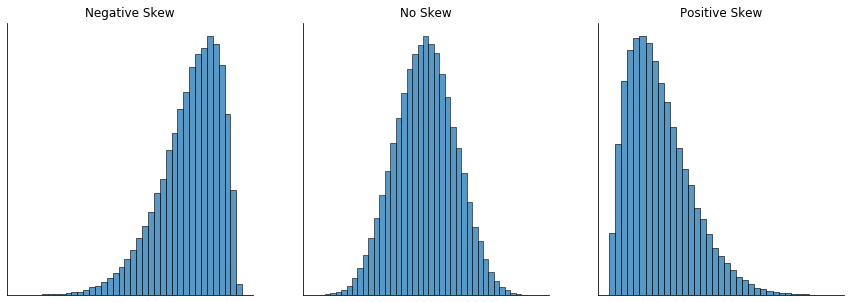

In [44]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df_skew = pd.read_csv('C:/Users/NMTRAN/Desktop/Personal/EPF/Data/skew_data.csv')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.histplot(data = df_skew.loc[df_skew['Skew'] == 'NegSkew'], x = 'Values', binwidth = 0.02, ax=axes[0])
ax2 = sns.histplot(data = df_skew.loc[df_skew['Skew'] == 'NoSkew'], x = 'Values', binwidth = 0.02, ax=axes[1])
ax3 = sns.histplot(data = df_skew.loc[df_skew['Skew'] == 'PosSkew'], x = 'Values', binwidth = 0.02, ax=axes[2])

axes[0].set_title("Negative Skew")
axes[1].set_title("No Skew")
axes[2].set_title("Positive Skew")

for ax in axes:
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.tick_params(bottom=False)
    ax.tick_params(left=False)

sns.despine()

Above is an illustration of skewness. On the left we have a negatively skewed data set (skewness = -.93), in the middle we have a data set with no skew (technically, skewness = .006), and on the right we have a positively skewed data set (skewness = .93).

Since it's the more interesting of the two, let's start by talking about the **_skewness_**. Skewness is basically a measure of asymmetry, and the easiest way to explain it is by drawing some pictures. As figure above illustrates, if the data tend to have a lot of extreme small values (i.e., the lower tail is "longer" than the upper tail) and not so many extremely large values (left panel), then we say that the data are *negatively skewed*. On the other hand, if there are more extremely large values than extremely small ones (right panel) we say that the data are *positively skewed*. That's the qualitative idea behind skewness. The actual formula for the skewness of a data set is as follows

<font color='blue'>

$$
\mbox{skewness}(X) = \frac{1}{N \hat{\sigma}^3} \sum_{i=1}^N (X_i - \bar{X})^3
$$

</font>



where $N$ is the number of observations, $\bar{X}$ is the sample mean, and $\hat{\sigma}$ is the standard deviation (the "divide by $N-1$" version, that is). Luckily, `pandas`
already knows how to calculate skew:

In [45]:
margins.skew(axis = 0, skipna = True)

0.7804075289401982

The final measure that is sometimes referred to, though very rarely in practice, is the **_kurtosis_** of a data set. Put simply, kurtosis is a measure of the "pointiness" of a data set, as illustrated in the figure below:

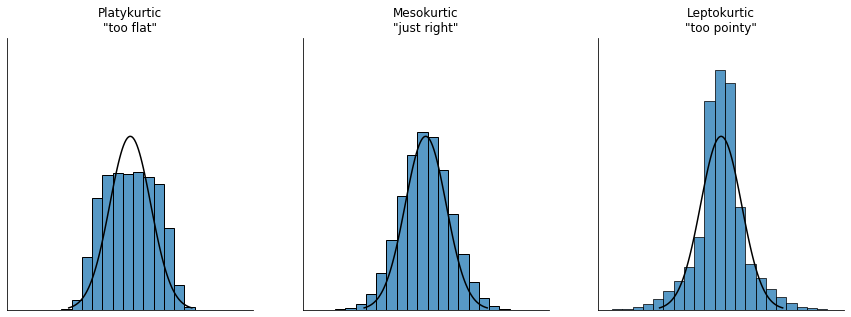

In [46]:
import numpy as np                                                              
import seaborn as sns                                                           
from scipy import stats                                                         
import matplotlib.pyplot as plt

# load some data

df_kurtosis = pd.read_csv('C:/Users/NMTRAN/Desktop/Personal/EPF/Data/kurtosisdata.csv')

# define a normal distribution with a mean of 0 and a standard deviation of 1
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

platykurtic = df_kurtosis.loc[df_kurtosis["Kurtosis"] == "Platykurtic"]
mesokurtic = df_kurtosis.loc[df_kurtosis["Kurtosis"] == "Mesokurtic"]
leptokurtic = df_kurtosis.loc[df_kurtosis["Kurtosis"] == "Leptokurtic"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ax1 = sns.histplot(data=platykurtic, x = "Values", binwidth=.5, ax=axes[0])
ax2 = sns.histplot(data=mesokurtic, x = "Values", binwidth=.5,  ax=axes[1])
ax3 = sns.histplot(data=leptokurtic, x = "Values", binwidth=.5, ax=axes[2])

#ax2 = ax.twinx()
sns.lineplot(x=x,y=y*40000, ax=ax1, color='black')
sns.lineplot(x=x,y=y*40000, ax=ax2, color='black')
sns.lineplot(x=x,y=y*40000, ax=ax3, color='black')

axes[0].set_title("Platykurtic\n\"too flat\"")
axes[1].set_title("Mesokurtic\n\"just right\"")
axes[2].set_title("Leptokurtic\n\"too pointy\"")

for ax in axes:
    ax.set_xlim(-6,6)
    ax.set_ylim(0,25000)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.tick_params(bottom=False)
    ax.tick_params(left=False)

sns.despine()


Above is an illustration of kurtosis. On the left, we have a “platykurtic” data set (kurtosis = -.95), meaning that the data set is “too flat”. In the middle we have a “mesokurtic” data set (kurtosis is almost exactly 0), which means that the pointiness of the data is just about right. Finally, on the right, we have a “leptokurtic” data set (kurtosis = 2.12) indicating that the data set is “too pointy”. Note that kurtosis is measured with respect to a normal curve (black line).


By convention, we say that the "normal curve" (black lines) has zero kurtosis, so the pointiness of a data set is assessed relative to this curve. In this Figure, the data on the left are not pointy enough, so the kurtosis is negative and we call the data *platykurtic*. The data on the right are too pointy, so the kurtosis is positive and we say that the data is *leptokurtic*. But the data in the middle are just pointy enough, so we say that it is *mesokurtic* and has kurtosis zero. This is summarised in the table below:

|informal term      |technical name |kurtosis value |
|:------------------|:--------------|:--------------|
|too flat           |platykurtic    |negative       |
|just pointy enough |mesokurtic     |zero           |
|too pointy         |leptokurtic    |positive       |


The equation for kurtosis is pretty similar in spirit to the formulas we've seen already for the variance and the skewness; except that where the variance involved squared deviations and the skewness involved cubed deviations, the kurtosis involves raising the deviations to the fourth power:

<font color='blue'>
$$
\mbox{kurtosis}(X) = \frac{1}{N \hat\sigma^4} \sum_{i=1}^N \left( X_i - \bar{X} \right)^4  - 3
$$
</font>



In [47]:
print("Pandas: ", margins.kurtosis())
print("Fischer: ",stats.kurtosis(margins, fisher=True))
print("Pearson: ",stats.kurtosis(margins, fisher=False))

Pandas:  0.10109718805638757
Fischer:  0.06434955786516161
Pearson:  3.0643495578651616


Take your pick, I guess? `pandas` actually also calculates Fischer kurtosis, but `stats.kurtosis(margins, fisher=True)` adds a "bias correction" by default, while the `pandas` version doesn't. `stats.kurtosis(margins, fisher=True, bias=False)`will get you the same thing as the `pandas` version. If you want to assess the kurtosis of the data, you could probably do worse than just plotting the data and using your eyeballs.

<font color='darkgreen'>

## Important: Getting an overall summary of a variable

Up to this point in the chapter I've explained several different summary statistics that are commonly used when analysing data, along with specific functions that you can use in Python to calculate each one. However, it's kind of annoying to have to separately calculate means, medians, standard deviations, skews etc. Wouldn't it be nice if Python had some helpful functions that would do all these tedious calculations at once? Something that *describes* the data? Maybe something like `describe()`, perhaps? Why yes, yes it would. So much so that this very function exists, available as a method for `pandas` objects.



### "Describing" a variable

The `describe()` method is an easy thing to use, but a tricky thing to understand in full, since it's a generic function. The basic idea behind the `describe()` method is that it prints out some useful information about whatever object (i.e., variable, as far as we're concerned) you ask it to describe. As a consequence, the behaviour of the `describe()` function differs quite dramatically depending on the class of the object that you give it. Let's start by giving it a *numeric* object:
<font>

In [48]:
afl_margins.describe()

,afl.margins
count,176.000000
mean,35.301136
std,26.073636
min,0.000000
25%,12.750000
50%,30.500000
75%,50.500000
max,116.000000


<font color='darkgreen'>

For numeric variables, we get a whole bunch of useful descriptive statistics. It gives us the minimum and maximum values (i.e., the range), the first and third quartiles (25th and 75th percentiles; i.e., the IQR), the mean and the median. In other words, it gives us a pretty good collection of descriptive statistics related to the central tendency and the spread of the data.

Okay, what about if we feed it a logical vector instead? Let's say I want to know something about how many "blowouts" there were in the 2010 AFL season. I operationalise the concept of a blowout as a game in which the winning margin exceeds 50 points. Let's create a logical variable `blowouts` in which the $i$-th element is `TRUE` if that game was a blowout according to my definition:

<font>


In [49]:
afl_margins['blowouts'] = np.where(afl_margins['afl.margins'] > 50, True, False)
afl_margins.head()

,afl.margins,blowouts
0,56,True
1,31,False
2,56,True
3,8,False
4,32,False


<font color='darkgreen'>
So that's what the `blowouts` variable looks like. Now let's ask Python to `describe()` this data: 
<font>

In [50]:
afl_margins['blowouts'].describe()

count       176
unique        2
top       False
freq        132
Name: blowouts, dtype: object

<font color='darkgreen'>

In this context, `describe` gives us the total number of games (176), the number of categories for those games (2, either blowout or not a blowout), the most common category (False, that is, not a blowout), and a count for the more common category. A little cryptic, but not entirely unreasonable. 



### "Describing" a data frame

Okay what about data frames? When you `describe()` a dataframe, it produces a slightly condensed summary of each variable inside the data frame (as long as you specify that you want `'all'` the variables). To give you a sense of how this can be useful, let's try this for a new data set, one that you've never seen before. The data is stored in the `clinical_trial_data.csv` file. Let's load it, and see what we've got:

<font>

In [51]:
import pandas as pd
df_clintrial = pd.read_csv('C:/Users/NMTRAN/Desktop/Personal/EPF/Data/clinical_trial_data.csv')
df_clintrial.head()

,drug,therapy,mood_gain
0,placebo,no.therapy,0.5
1,placebo,no.therapy,0.3
2,placebo,no.therapy,0.1
3,anxifree,no.therapy,0.6
4,anxifree,no.therapy,0.4


<font color='darkgreen'>
Our dataframe `df_clintrial` contains three variables, `drug`, `therapy` and `mood_gain`. Presumably then, this data is from a clinical trial of some kind, in which people were administered different drugs, and the researchers looked to see what the drugs did to their mood. Let's see if the `describe()` function sheds a little more light on this situation:
<font>

In [52]:
df_clintrial.describe(include = 'all')

,drug,therapy,mood_gain
count,18,18,18.000000
unique,3,2,NaN
top,placebo,no.therapy,NaN
freq,6,9,NaN
mean,NaN,NaN,0.883333
std,NaN,NaN,0.533854
min,NaN,NaN,0.100000
25%,NaN,NaN,0.425000
50%,NaN,NaN,0.850000
75%,NaN,NaN,1.300000


<font color='darkgreen'>
If we want to `describe` the entire dataframe, we need to add the argument  `include = 'all'`. This gives us information on all of the of columns, but this is still rather limited. 
<font>

<font color='darkgreen'>
    
## C. Bi-variate analysis: Correlations

Up to this point we have focused entirely on how to construct descriptive statistics for a single variable. What we haven't done is talked about how to describe the relationships *between* variables in the data. To do that, we want to talk mostly about the **_correlation_** between variables. But first, we need some data.

Let's work on the `parenthood.csv` data

<font color='darkgreen'>

In [53]:
import pandas as pd
parenthood = pd.read_csv('C:/Users/NMTRAN/Desktop/Personal/EPF/Data/parenthood.csv')
parenthood.head()

,dad_sleep,baby_sleep,dad_grump,day
0,7.59,10.18,56,1
1,7.91,11.66,60,2
2,5.14,7.92,82,3
3,7.71,9.61,55,4
4,6.68,9.75,67,5


<font color='darkgreen'>
... we see that the file contains a single data frame called `parenthood`, which contains four variables `dad_sleep`, `baby_sleep`, `dad_grump` and `day`. Next, I'll calculate some basic descriptive statistics:
<font color='darkgreen'>

In [54]:
parenthood.describe()

,dad_sleep,baby_sleep,dad_grump,day
count,100.000000,100.000000,100.00000,100.000000
mean,6.965200,8.049200,63.71000,50.500000
std,1.015884,2.074232,10.04967,29.011492
min,4.840000,3.250000,41.00000,1.000000
25%,6.292500,6.425000,57.00000,25.750000
50%,7.030000,7.950000,62.00000,50.500000
75%,7.740000,9.635000,71.00000,75.250000
max,9.000000,12.070000,91.00000,100.000000


<font color='darkgreen'>
Finally, to give a graphical depiction of what each of the three interesting variables looks like

<font color='darkgreen'>


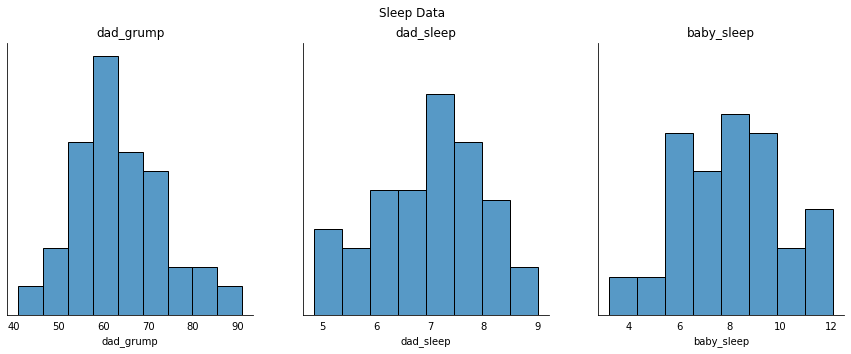

In [55]:
import seaborn as sns
from matplotlib import pyplot as plt

dad_grump = parenthood['dad_grump']
dad_sleep = parenthood['dad_sleep']
baby_sleep = parenthood['baby_sleep']

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Sleep Data')

# My grumpiness
sns.histplot(dad_grump, ax=axes[0])
axes[0].set_title(dad_grump.name)

# My sleep
sns.histplot(dad_sleep, ax=axes[1])
axes[1].set_title(dad_sleep.name)

# Baby's sleep
sns.histplot(baby_sleep, ax=axes[2])
axes[2].set_title(baby_sleep.name);

for ax in axes:
    ax.set(yticklabels=[])
    ax.set(ylabel=None)
    ax.tick_params(bottom=False)
    ax.tick_params(left=False)
    
sns.despine()

<font color='darkgreen'>
Above is the histograms for the three interesting variables in the parenthood data set.
<font color='darkgreen'>

<font color='darkgreen'>
One thing to note: just because Python can calculate dozens of different statistics doesn't mean you should report all of them. If I were writing this up for a report, I'd probably pick out those statistics that are of most interest to me (and to my readership), and then put them into a nice, simple table like the one in the table below. 

|variable                |min  |max   |mean  |median |std. dev |IQR  |
|:-----------------------|:----|:-----|:-----|:------|:--------|:----|
|Dad's grumpiness        |41   |91    |63.71 |62     |10.05    |14   |
|Dad's hours slept       |4.84 |9     |6.97  |7.03   |1.02     |1.45 |
|Son's hours slept |3.25 |12.07 |8.05  |7.95   |2.07     |3.21 |
<font color='darkgreen'>


<font color='darkgreen'>
    
### The strength and direction of a relationship
<font color='darkgreen'>


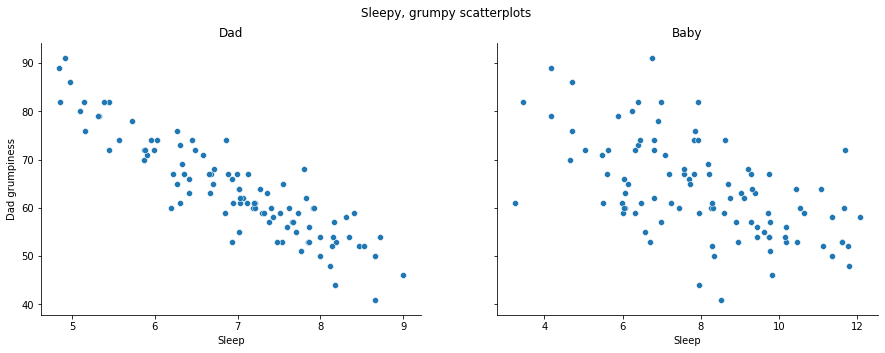

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Sleepy, grumpy scatterplots')

sns.scatterplot(x = dad_sleep, y = dad_grump, ax = axes[0])
fig.axes[0].set_title("Dad")
fig.axes[0].set_xlabel("Sleep")
fig.axes[0].set_ylabel("Dad grumpiness")

sns.scatterplot(x = baby_sleep, y = dad_grump, ax = axes[1])
fig.axes[1].set_title("Baby")
fig.axes[1].set_xlabel("Sleep")
fig.axes[1].set_ylabel("Dad grumpiness")

sns.despine()

<font color='darkgreen'>
Above are the scatterplots showing the relationship between dad.sleep and dad.grump (left) and the relationship between baby.sleep and dad.grump (right).
    <font color='darkgreen'>


<font color='darkgreen'>
We can draw scatterplots to give us a general sense of how closely related two variables are. Ideally though, we might want to say a bit more about it than that. For instance, let's compare the relationship between `dad_sleep` and `dad_grump` with that between `baby_sleep` and `dad_grump`. 
    <br/>
    
When looking at these two plots side by side, it's clear that the relationship is *qualitatively* the same in both cases: more sleep equals less grump! However, it's also pretty obvious that the relationship between `dad_sleep` and `dad_grump` is *stronger* than the relationship between `baby_sleep` and `dad_grump`. The plot on the left is "neater" than the one on the right. 
    
> What it feels like is that if you want to predict what the dad's mood is, it'd help you a little bit to know how many hours the baby slept, but it'd be *more* helpful to know how many hours the dad slept.
<font color='darkgreen'>


<font color='darkgreen'>
In contrast, If we compare the scatterplot of "`baby_sleep` v `dad_grump`" to the scatterplot of `baby_sleep` v `dad_sleep`, the overall strength of the relationship is the same, but the direction is different. That is, if the baby sleeps more, the dad get *more* sleep (positive relationship, but if the baby sleeps more then the dad get *less* grumpy (negative relationship).
    <font color='darkgreen'>

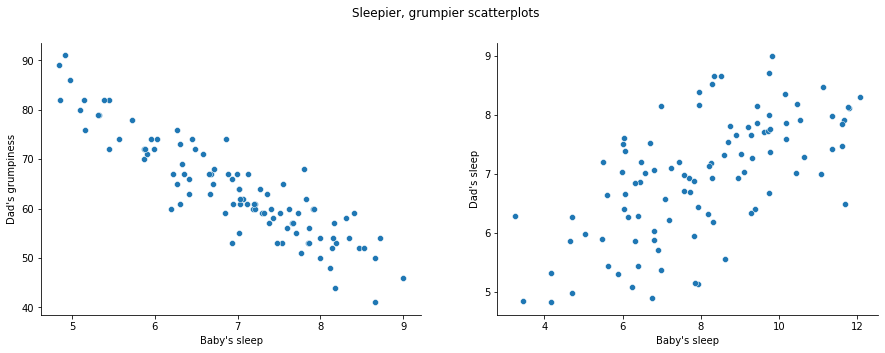

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False) # y axes are now on different scales, so sharey=False
fig.suptitle('Sleepier, grumpier scatterplots')

sns.scatterplot(x = dad_sleep, y = dad_grump, ax = axes[0])
fig.axes[0].set_xlabel("Baby's sleep")
fig.axes[0].set_ylabel("Dad's grumpiness")

sns.scatterplot(x = baby_sleep, y = dad_sleep, ax = axes[1])
fig.axes[1].set_xlabel("Baby's sleep")
fig.axes[1].set_ylabel("Dad's sleep")

sns.despine()
#glue("sleep_scatter-fig2", fig, display=False)

<font color='darkgreen'>
Scatterplots showing the relationship between baby_sleep and dad_grump (left), as compared
to the relationship between baby.sleep and dad.sleep (right).
<font color='darkgreen'>


<font color='darkgreen'>

### The correlation coefficient

We can make these ideas a bit more explicit by introducing the idea of a **_correlation coefficient_** (or, more specifically, Pearson's correlation coefficient), which is traditionally denoted by $r$. The correlation coefficient between two variables $X$ and $Y$ (sometimes denoted $r_{XY}$) is a measure that varies from $-1$ to $1$. 
    
When $r = -1$ it means that we have a perfect negative relationship, and when $r = 1$ it means we have a perfect positive relationship. When $r = 0$, there's no relationship at all. If you look at the figures below, you can see several plots showing what different correlations look like.
<font color='darkgreen'>


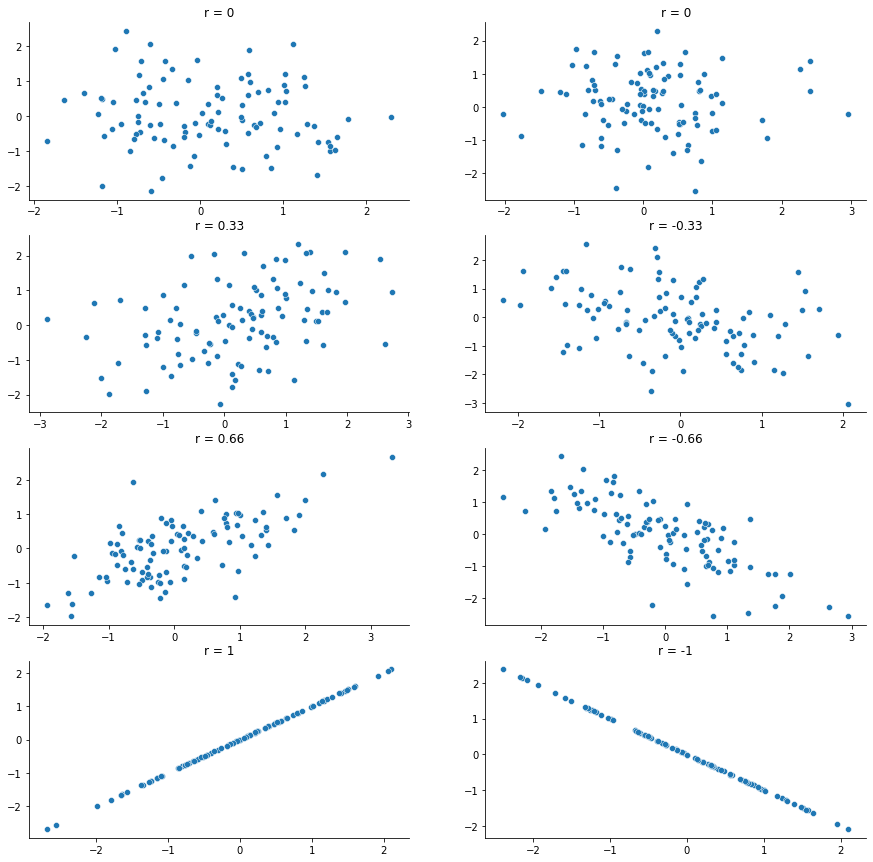

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

mean = [0, 0]
cov = [[1, 0], [0, 1]]
r = [0, .33, .66, 1]
rneg = [0, -.33, -.66, -1]

fig, axes = plt.subplots(4, 2, figsize=(15, 15), sharey=False)

for s, val in enumerate(r):
    cov = [[1, val], [val, 1]]
    x, y = np.random.multivariate_normal(mean, cov, 100).T
    sns.scatterplot(x=x,y=y, ax = axes[s,0])
    axes[s,0].set_title('r = ' + str(val))

for s, val in enumerate(rneg):
    cov = [[1, val], [val, 1]]
    x, y = np.random.multivariate_normal(mean, cov, 100).T
    sns.scatterplot(x=x,y=y, ax = axes[s,1])
    axes[s,1].set_title('r = ' + str(val))


sns.despine()

<font color='darkgreen'>

Above is the illustration of the effect of varying the strength and direction of a correlation. In the left hand column, the correlations are 0, .33, .66 and 1. In the right hand column, the correlations are 0, -.33, -.66 and -1.

<font color='darkgreen'>


<font color='darkgreen'>

The formula for the Pearson's correlation coefficient can be written in several different ways. I think the simplest way to write down the formula is to break it into two steps. Firstly, let's introduce the idea of a **_covariance_**. The covariance between two variables $X$ and $Y$ is a generalisation of the notion of the variance; it's a mathematically simple way of describing the relationship between two variables that isn't terribly informative to humans:

$$
\mbox{Cov}(X,Y) = \frac{1}{N-1} \sum_{i=1}^N \left( X_i - \bar{X} \right) \left( Y_i - \bar{Y} \right)
$$

Because we're multiplying (i.e., taking the "product" of) a quantity that depends on $X$ by a quantity that depends on $Y$ and then averaging. You can think of the formula for the covariance as an "average cross product" between $X$ and $Y$. The covariance has the nice property that, if $X$ and $Y$ are entirely unrelated, then the covariance is exactly zero. If the relationship between them is positive, then the correlation is greater than zero. If the relationship is negative, the correlation is smaller than zero.
    


The Pearson correlation coefficient $r$ fixes this interpretation problem by standardising the covariance, in pretty much the exact same way that the $z$-score standardises a raw score: by dividing by the standard deviation. However, because we have two variables that contribute to the covariance, the standardisation only works if we divide by both standard deviations (this is an oversimplification, but it'll do for our purposes)  In other words, the correlation between $X$ and $Y$ can be written as follows:

$$
r_{XY}  = \frac{\mbox{Cov}(X,Y)}{ \hat{\sigma}_X \ \hat{\sigma}_Y}
$$

By doing this standardisation, not only do we keep all of the nice properties of the covariance discussed earlier, but the actual values of $r$ are on a meaningful scale: $r= 1$ implies a perfect positive relationship, and $r = -1$ implies a perfect negative relationship. I'll expand a little more on this point later. But before I do, let's look at how to calculate correlations in Python.

 Just like we saw with the variance and the standard deviation, in practice we divide by $N-1$ rather than $N$.
<font color='darkgreen'>

<font color='darkgreen'>
Calculating correlations in Python can be done using the `corr()` method. The simplest way to use the command is to specify two input arguments `x` and `y`, each one corresponding to one of the variables. The following extract illustrates the basic usage of the function:

In [59]:
x = parenthood['dad_sleep']
y = parenthood['dad_grump']

In [60]:
x.corr(y)

-0.9033840374657273

<font color='darkgreen'> However, the `corr()` function is a bit more powerful than this simple example suggests. For example, you can also calculate a complete "correlation matrix", between all pairs of variables in the data frame:

In [61]:
parenthood.corr()

,dad_sleep,baby_sleep,dad_grump,day
dad_sleep,1.000000,0.627949,-0.903384,-0.098408
baby_sleep,0.627949,1.000000,-0.565964,-0.010434
dad_grump,-0.903384,-0.565964,1.000000,0.076479
day,-0.098408,-0.010434,0.076479,1.000000


<font color='darkgreen'>
    
## Summary

Calculating some basic descriptive statistics is one of the very first things you do when analysing real data, and descriptive statistics are much simpler to understand than inferential statistics, so like every other statistics textbook I've started with descriptives. In this chapter, we talked about the following topics:


- **Measures of central tendency**: Broadly speaking, central tendency measures tell you where the data are. There's three measures that are typically reported in the literature: the mean, median and mode.
- **Measures of variability**: In contrast, measures of variability tell you about how "spread out" the data are. The key measures are: range, standard deviation, interquartile reange 
- **Correlations**: Want to know how strong the relationship is between two variables? Calculate a correlation.

In [135]:
print (titanic_df)

     Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0      m

In [137]:
a = titanic_df["Age"]
b = titanic_df["Fare"]
a.corr(b)

0.1123286369994162

In [141]:
c = titanic_df["Survived"]
d = titanic_df["Pclass"] 
c.corr(d)

-0.3365282999457137

In [140]:
e = titanic_df["Siblings/Spouses Aboard"]
f = titanic_df["Parents/Children Aboard"]
e.corr(f)

0.4142439407051792

<font color='red'>
Questions:

    
**In the Titanic dataset:**
    
- Is there a correlation between passenger age and fare paid?
- Does passenger class correlate with survival rate?
- Is there a correlation between the number of siblings/spouses aboard and the number of parents/children aboard?

In [62]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

# Load the Titanic dataset
titanic_df = load_dataset('titanic')

# Question 1: Is there a correlation between passenger age and fare paid?
age_fare_corr = titanic_df[['age', 'fare']].corr().iloc[0,1]
print("Correlation between passenger age and fare paid:", age_fare_corr)

# Question 2: Does passenger class correlate with survival rate?
class_survival_corr = titanic_df[['pclass', 'survived']].corr().iloc[0,1]
print("Correlation between passenger class and survival rate:", class_survival_corr)

# Question 3: Is there a correlation between the number of siblings/spouses aboard and the number of parents/children aboard?
sibsp_parch_corr = titanic_df[['sibsp', 'parch']].corr().iloc[0,1]
print("Correlation between the number of siblings/spouses aboard and the number of parents/children aboard:", sibsp_parch_corr)

Correlation between passenger age and fare paid: 0.09606669176903912
Correlation between passenger class and survival rate: -0.3384810359610152
Correlation between the number of siblings/spouses aboard and the number of parents/children aboard: 0.41483769862015624
